In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
train_data = pd.read_csv(r'./data/train.csv')
test_data = pd.read_csv(r'./data/test.csv')

In [4]:

for trcol in train_data.columns:
    if train_data[trcol].dtype == 'object':
        train_data[trcol].fillna(train_data[trcol].mode()[0], inplace=True) #filling missing values with the mode
        
        if trcol in test_data.columns:
            test_data[trcol].fillna(test_data[trcol].mode()[0], inplace=True)
    
    else:
        train_data[trcol].fillna(train_data[trcol].mean(), inplace=True) #filling missing values with mean
        
        if trcol in test_data.columns:
            test_data[trcol].fillna(test_data[trcol].mean(), inplace=True)

#selecting Feature
feature = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']
X = train_data[feature]
y = train_data['SalePrice']

# Spiting the train data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

C:\Users\tvaru\AppData\Local\Temp\ipykernel_20420\3869605538.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[trcol].fillna(train_data[trcol].mean(), inplace=True) #filling missing values with mean
C:\Users\tvaru\AppData\Local\Temp\ipykernel_20420\3869605538.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

LinearRegression()

In [5]:
y_pred = model.predict(X_val)                           #Y prediction
mean_abs_err = mean_absolute_error(y_val, y_pred)       #Mean Absolute Error
mean_sq_err = mean_squared_error(y_val, y_pred)         #Mean Square Error
r2_scr = r2_score(y_val, y_pred)                        #r2 Score

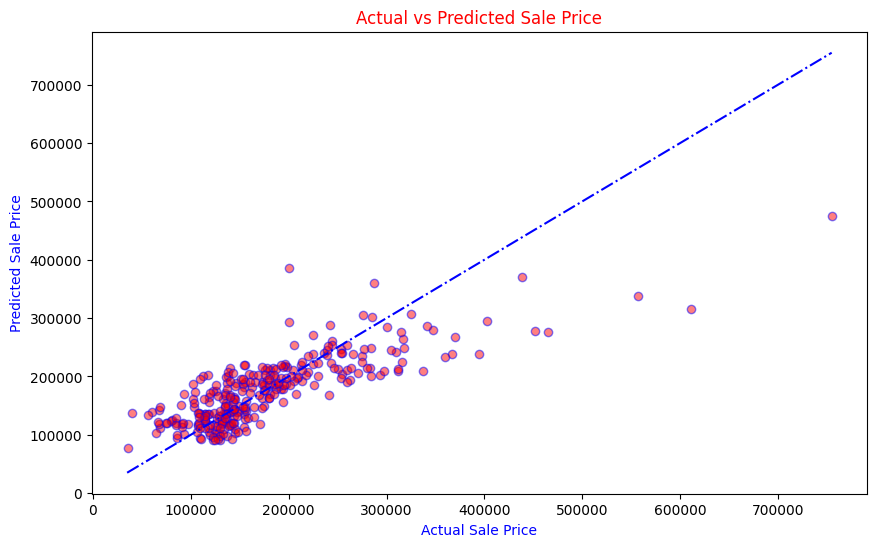

In [6]:
plt.figure(figsize=(10, 6))                             #Ploting Actual vs Predicted Sales Price
plt.scatter(y_val, y_pred, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Actual Sale Price', color='blue')
plt.ylabel('Predicted Sale Price', color='blue')
plt.title('Actual vs Predicted Sale Price', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b-.')
plt.show()

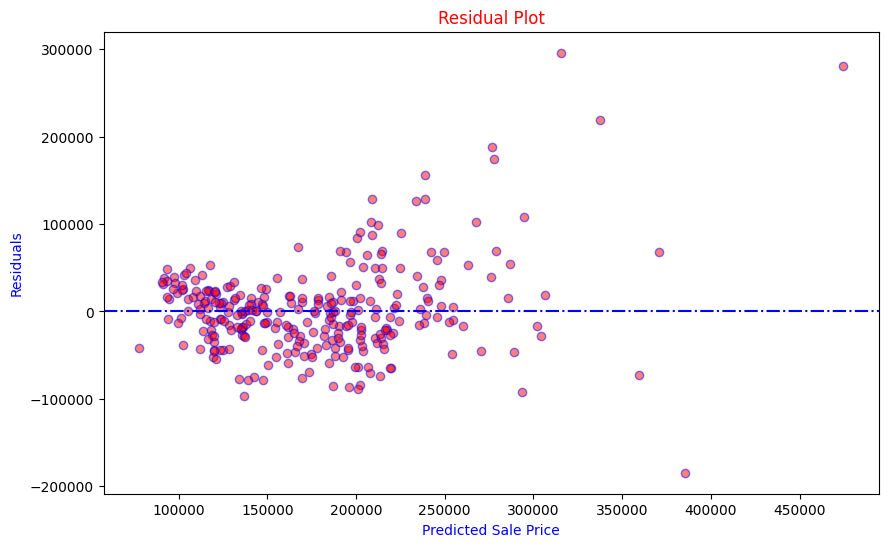

In [7]:
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Predicted Sale Price', color='blue')
plt.ylabel('Residuals', color='blue')
plt.title('Residual Plot', color='red')
plt.axhline(y=0, color='b', linestyle='-.')
plt.show()

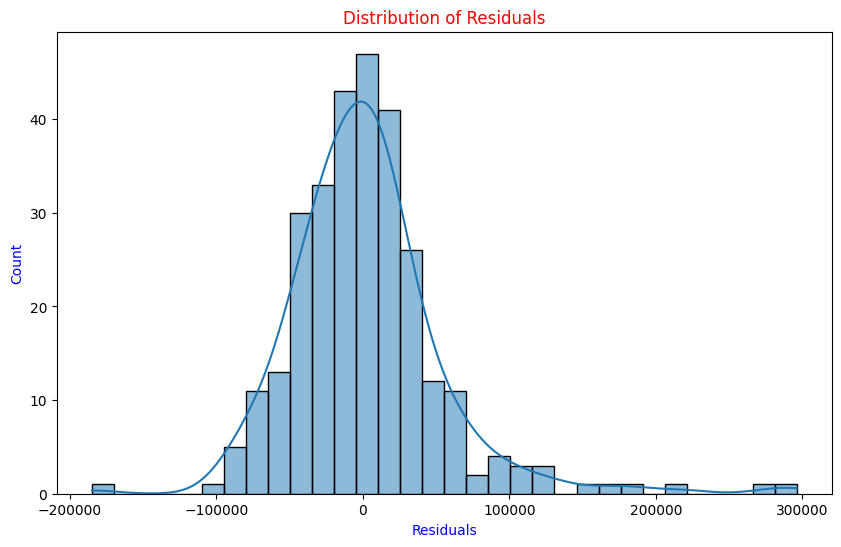

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals', color='b')
plt.ylabel('Count', color='b')
plt.title('Distribution of Residuals', color='r')
plt.show()

<Figure size 1200x800 with 0 Axes>

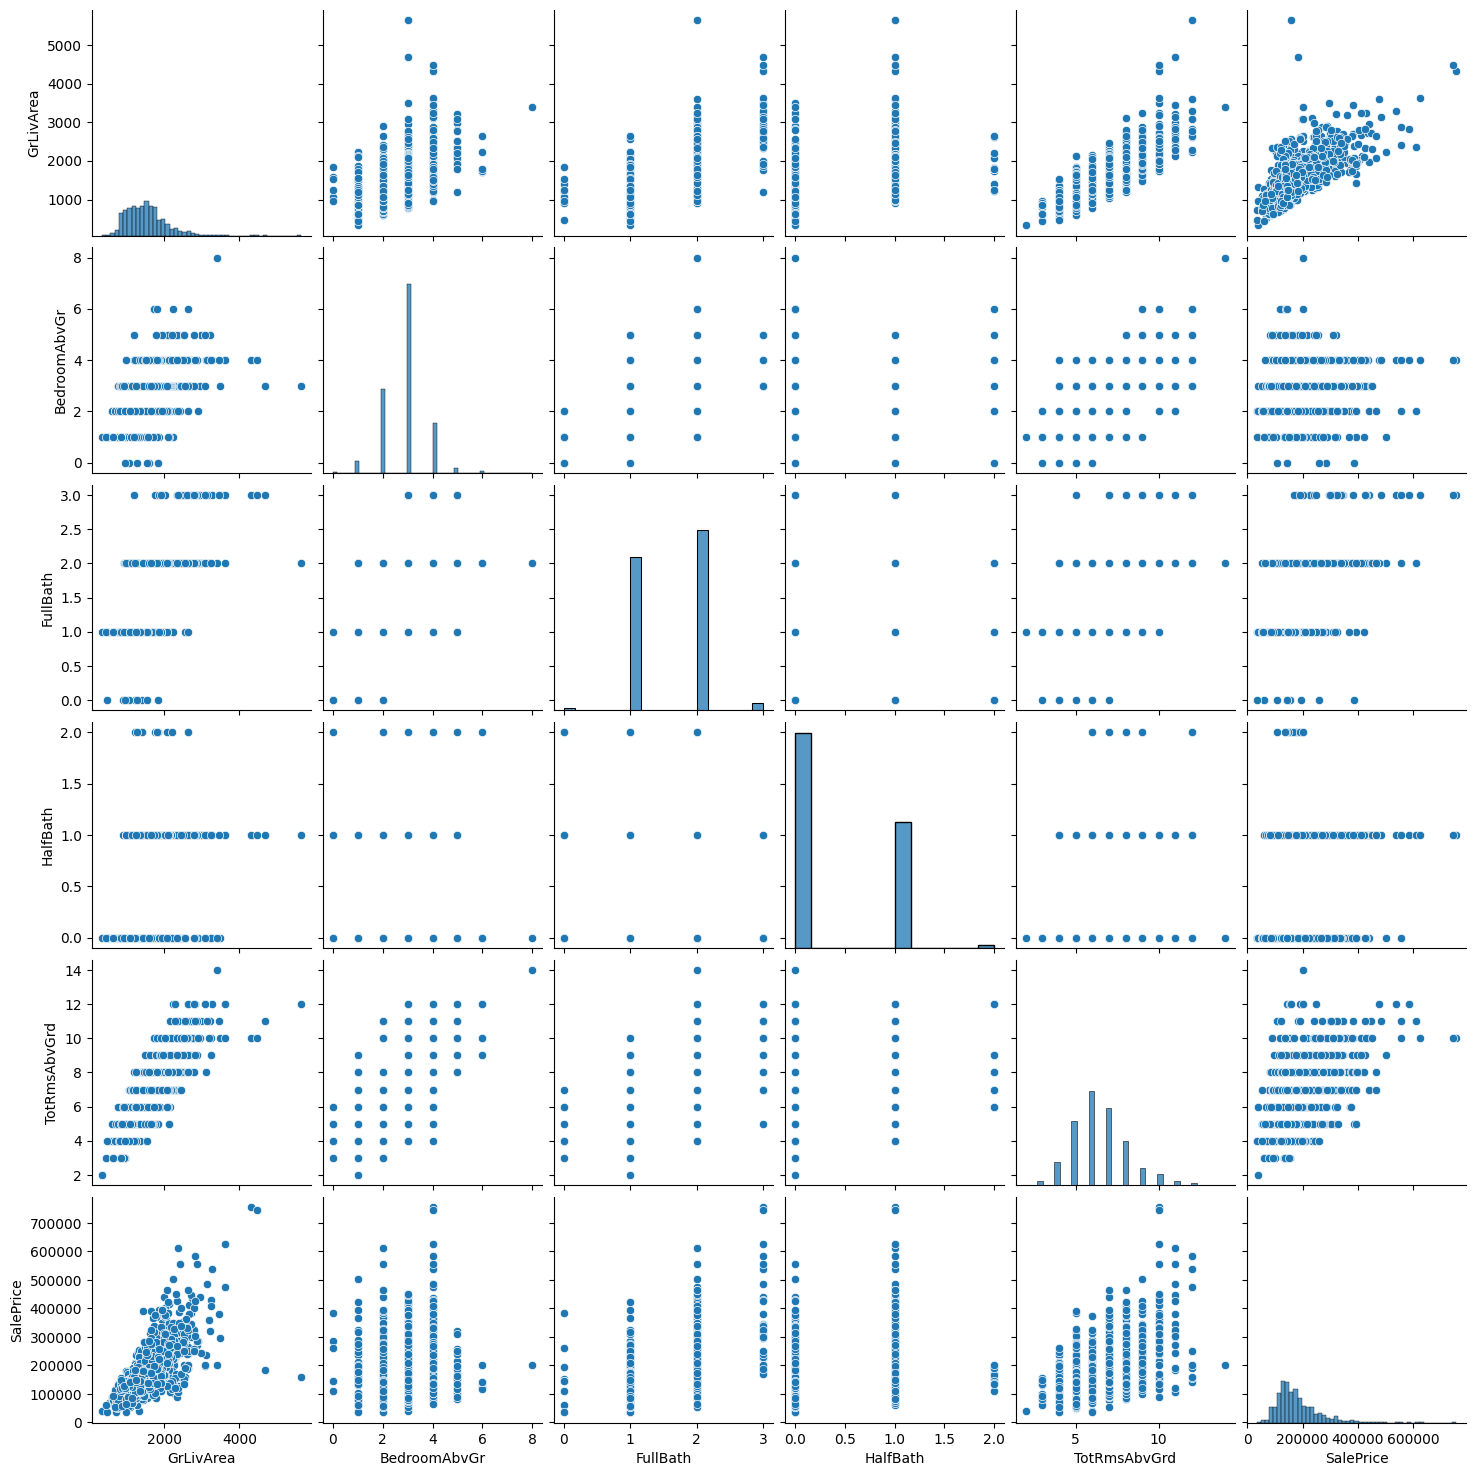

In [9]:
plt.figure(figsize=(12, 8))
sns.pairplot(train_data[feature + ['SalePrice']])
plt.show()

In [10]:
ex_data = {'GrLivArea':[1000],'BedroomAbvGr':[5],'FullBath':[1],'HalfBath':[3],'TotRmsAbvGrd':[4]}
example = pd.DataFrame(ex_data)
example_prediction = model.predict(example)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

X_test = test_data[feature]
test_predictions = model.predict(X_test)

pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
pred.to_csv('Predictions.csv', index=False)

Example Prediction: $57,750.24
